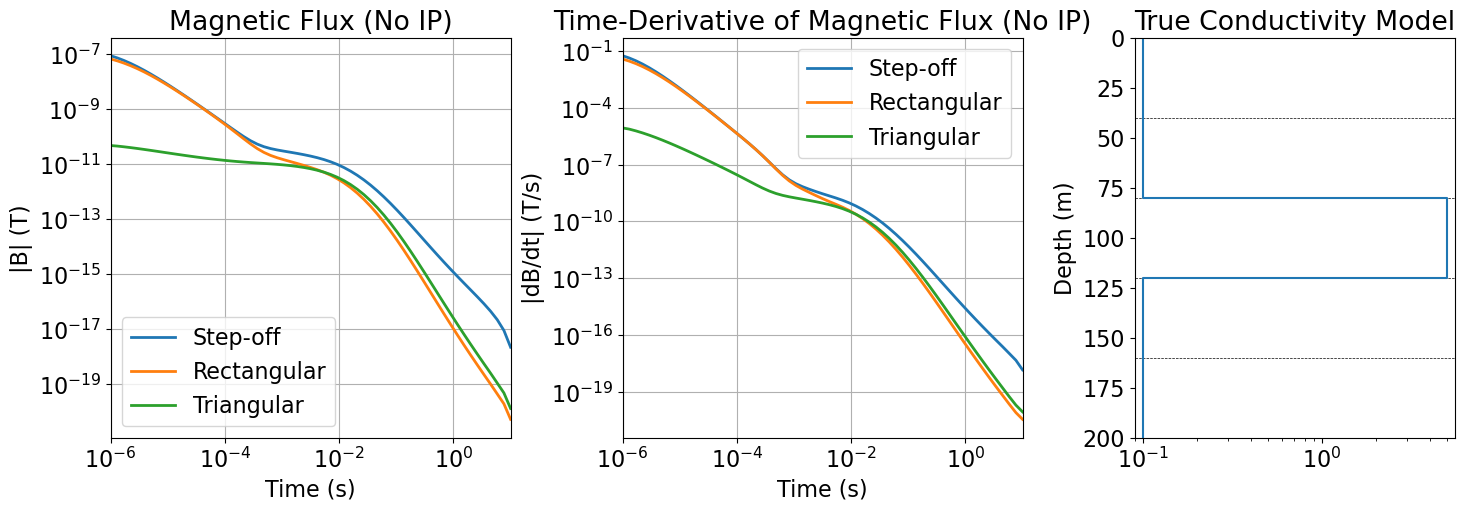

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
source_location = np.array([0.0, 0.0, 0.5])
receiver_location = np.array([0.0, 0.0, 0.5])
receiver_orientation = "z"
times = np.logspace(-6, 1, 61)

receiver_list = [
    tdem.receivers.PointMagneticFluxDensity(receiver_location, times, orientation=receiver_orientation),
    tdem.receivers.PointMagneticFluxTimeDerivative(receiver_location, times, orientation=receiver_orientation),
]
stepoff_waveform = tdem.sources.StepOffWaveform()
rectangular_waveform = tdem.sources.TrapezoidWaveform(
    ramp_on=np.r_[-0.004, -0.004 + 1e-6], ramp_off=np.r_[-1e-6, 0.0]
)
triangular_waveform = tdem.sources.TriangularWaveform(
    start_time=-0.02, peak_time=-0.01, off_time=0.0
)

waveforms = {
    "Step-off": stepoff_waveform,
    "Rectangular": rectangular_waveform,
    "Triangular": triangular_waveform,
}
thicknesses = np.array([40.0, 40.0, 40.0, 40.0])  
n_layer = len(thicknesses) + 1
sigma = 0.1 * np.ones(n_layer)
sigma[2] = 5.0 

# Mapping
model_mapping = maps.IdentityMap(nP=n_layer)
dpred_results = {}

for name, waveform in waveforms.items():
    source = tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=3.0,
        radius=10.0,
    )
    survey = tdem.Survey([source])
    
    sim_conductive = tdem.Simulation1DLayered(
        survey=survey,
        thicknesses=thicknesses,
        sigmaMap=model_mapping,
    )
    dpred = sim_conductive.dpred(sigma)
    dpred_results[name] = dpred

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_axes([0.1, 0.1, 0.25, 0.8])
for name, dpred in dpred_results.items():
    ax1.loglog(times, np.abs(dpred[:len(times)]), lw=2, label=name)
ax1.set_xlim([times.min(), times.max()])
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("|B| (T)")
ax1.set_title("Magnetic Flux (No IP)")
ax1.legend()
ax1.grid(True)
ax2 = fig.add_axes([0.42, 0.1, 0.25, 0.8])
for name, dpred in dpred_results.items():
    ax2.loglog(times, np.abs(dpred[len(times):]), lw=2, label=name)
ax2.set_xlim([times.min(), times.max()])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("|dB/dt| (T/s)")
ax2.set_title("Time-Derivative of Magnetic Flux (No IP)")
ax2.legend()
ax2.grid(True)
ax3 = fig.add_axes([0.74, 0.1, 0.2, 0.8])
plot_1d_layer_model(thicknesses, sigma, ax=ax3, show_layers=True, )
ax3.set_title("True Conductivity Model")

plt.show()


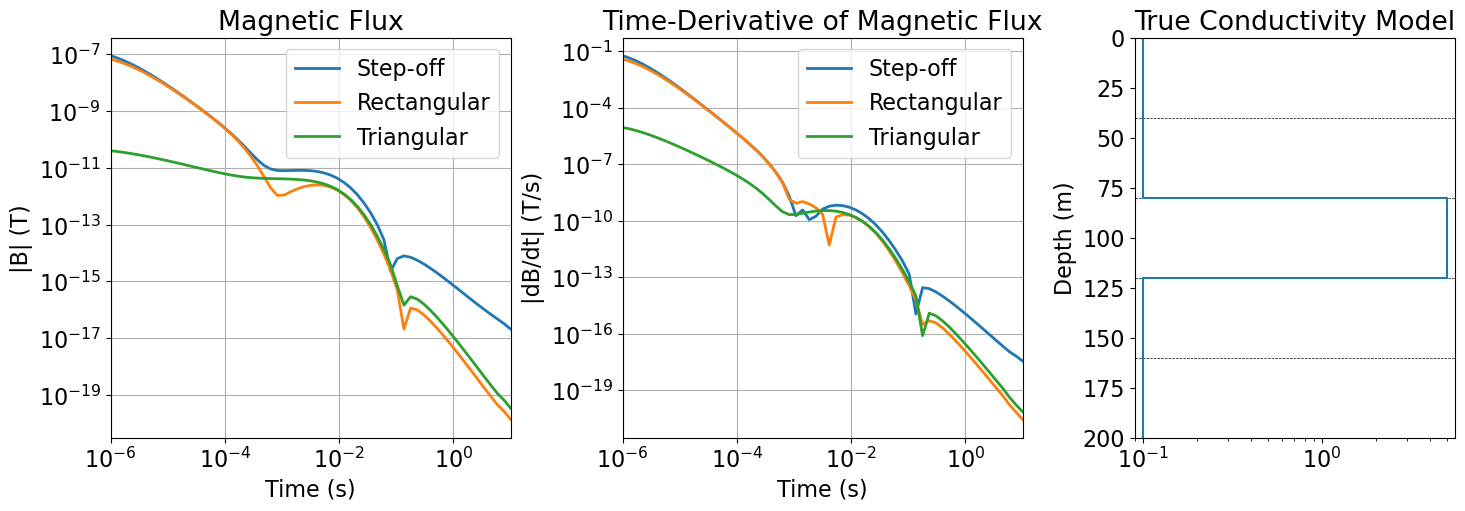

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
source_location = np.array([0.0, 0.0, 0.5])
receiver_location = np.array([0.0, 0.0, 0.5])
receiver_orientation = "z"
times = np.logspace(-6, 1, 61)

receiver_list = [
    tdem.receivers.PointMagneticFluxDensity(receiver_location, times, orientation=receiver_orientation),
    tdem.receivers.PointMagneticFluxTimeDerivative(receiver_location, times, orientation=receiver_orientation),
]
stepoff_waveform = tdem.sources.StepOffWaveform()
rectangular_waveform = tdem.sources.TrapezoidWaveform(
    ramp_on=np.r_[-0.004, -0.004 + 1e-6], ramp_off=np.r_[-1e-6, 0.0]
)
triangular_waveform = tdem.sources.TriangularWaveform(
    start_time=-0.02, peak_time=-0.01, off_time=0.0
)

waveforms = {
    "Step-off": stepoff_waveform,
    "Rectangular": rectangular_waveform,
    "Triangular": triangular_waveform,
}
thicknesses = np.array([40.0, 40.0, 40.0, 40.0]) 
n_layer = len(thicknesses) + 1
sigma = 0.1 * np.ones(n_layer)
sigma[2] = 5.0 
eta = 0.3 * np.ones(n_layer)
tau = 0.01 * np.ones(n_layer)
c = 0.75 * np.ones(n_layer)
model_mapping = maps.IdentityMap(nP=n_layer)
dpred_results = {}

for name, waveform in waveforms.items():
    source = tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=3.0,
        radius=10.0,
    )
    survey = tdem.Survey([source])
    
    sim_chargeable = tdem.Simulation1DLayered(
        survey=survey,
        thicknesses=thicknesses,
        sigmaMap=model_mapping,
        eta=eta,
        tau=tau,
        c=c,
    )
    dpred = sim_chargeable.dpred(sigma)
    dpred_results[name] = dpred
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.25, 0.8])
for name, dpred in dpred_results.items():
    ax1.loglog(times, np.abs(dpred[:len(times)]), lw=2, label=name)
ax1.set_xlim([times.min(), times.max()])
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("|B| (T)")
ax1.set_title("Magnetic Flux")
ax1.legend()
ax1.grid(True)
ax2 = fig.add_axes([0.42, 0.1, 0.25, 0.8])
for name, dpred in dpred_results.items():
    ax2.loglog(times, np.abs(dpred[len(times):]), lw=2, label=name)
ax2.set_xlim([times.min(), times.max()])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("|dB/dt| (T/s)")
ax2.set_title("Time-Derivative of Magnetic Flux")
ax2.legend()
ax2.grid(True)
ax3 = fig.add_axes([0.74, 0.1, 0.2, 0.8])
plot_1d_layer_model(thicknesses, sigma, ax=ax3, show_layers=True)
ax3.set_title("True Conductivity Model")

plt.show()
